# Task
EDA

Here is all the data you need:
"mahakumbh.csv"

## Data loading

### Subtask:
Load the data from "mahakumbh.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "mahakumbh.csv" into a pandas DataFrame and display basic information about it.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('mahakumbh.csv')
    display(df.head())
    print(df.shape)
    df.info()
except FileNotFoundError:
    print("Error: 'mahakumbh.csv' not found. Please ensure the file exists in the current directory.")
except pd.errors.EmptyDataError:
    print("Error: 'mahakumbh.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'mahakumbh.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Visitor_ID,Gender,Age,State,Date_of_Visit,Duration_of_Stay,Mode_of_Transport,Purpose_of_Visit,Accommodation_Type,Expenditure,Satisfaction_Score
0,1,Male,10,Punjab,2025-03-11,6,Air,Tourism,Dharmshala,16552,5
1,2,Female,28,West Bengal,2025-01-26,5,Air,Tourism,Tent,35653,1
2,3,Male,11,Punjab,2025-03-09,7,Bus,Tourism,Tent,47576,1
3,4,Male,62,West Bengal,2025-01-19,2,Private Vehicle,Tourism,Dharmshala,1171,4
4,5,Male,53,Bihar,2025-03-25,7,Air,Pilgrimage,Hotel,663,4


(300, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Visitor_ID          300 non-null    int64 
 1   Gender              300 non-null    object
 2   Age                 300 non-null    int64 
 3   State               300 non-null    object
 4   Date_of_Visit       300 non-null    object
 5   Duration_of_Stay    300 non-null    int64 
 6   Mode_of_Transport   300 non-null    object
 7   Purpose_of_Visit    300 non-null    object
 8   Accommodation_Type  300 non-null    object
 9   Expenditure         300 non-null    int64 
 10  Satisfaction_Score  300 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 25.9+ KB


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, and observe initial patterns.


**Reasoning**:
Examine data types, missing values, descriptive statistics, unique values of categorical columns, and distributions of numerical features; calculate the correlation matrix, and summarize observations.



Data Types:
 Visitor_ID             int64
Gender                object
Age                    int64
State                 object
Date_of_Visit         object
Duration_of_Stay       int64
Mode_of_Transport     object
Purpose_of_Visit      object
Accommodation_Type    object
Expenditure            int64
Satisfaction_Score     int64
dtype: object

Missing Values:
 Visitor_ID            0
Gender                0
Age                   0
State                 0
Date_of_Visit         0
Duration_of_Stay      0
Mode_of_Transport     0
Purpose_of_Visit      0
Accommodation_Type    0
Expenditure           0
Satisfaction_Score    0
dtype: int64

Missing Value Percentage:
 Visitor_ID            0.0
Gender                0.0
Age                   0.0
State                 0.0
Date_of_Visit         0.0
Duration_of_Stay      0.0
Mode_of_Transport     0.0
Purpose_of_Visit      0.0
Accommodation_Type    0.0
Expenditure           0.0
Satisfaction_Score    0.0
dtype: float64

Descriptive Statistics for Nu

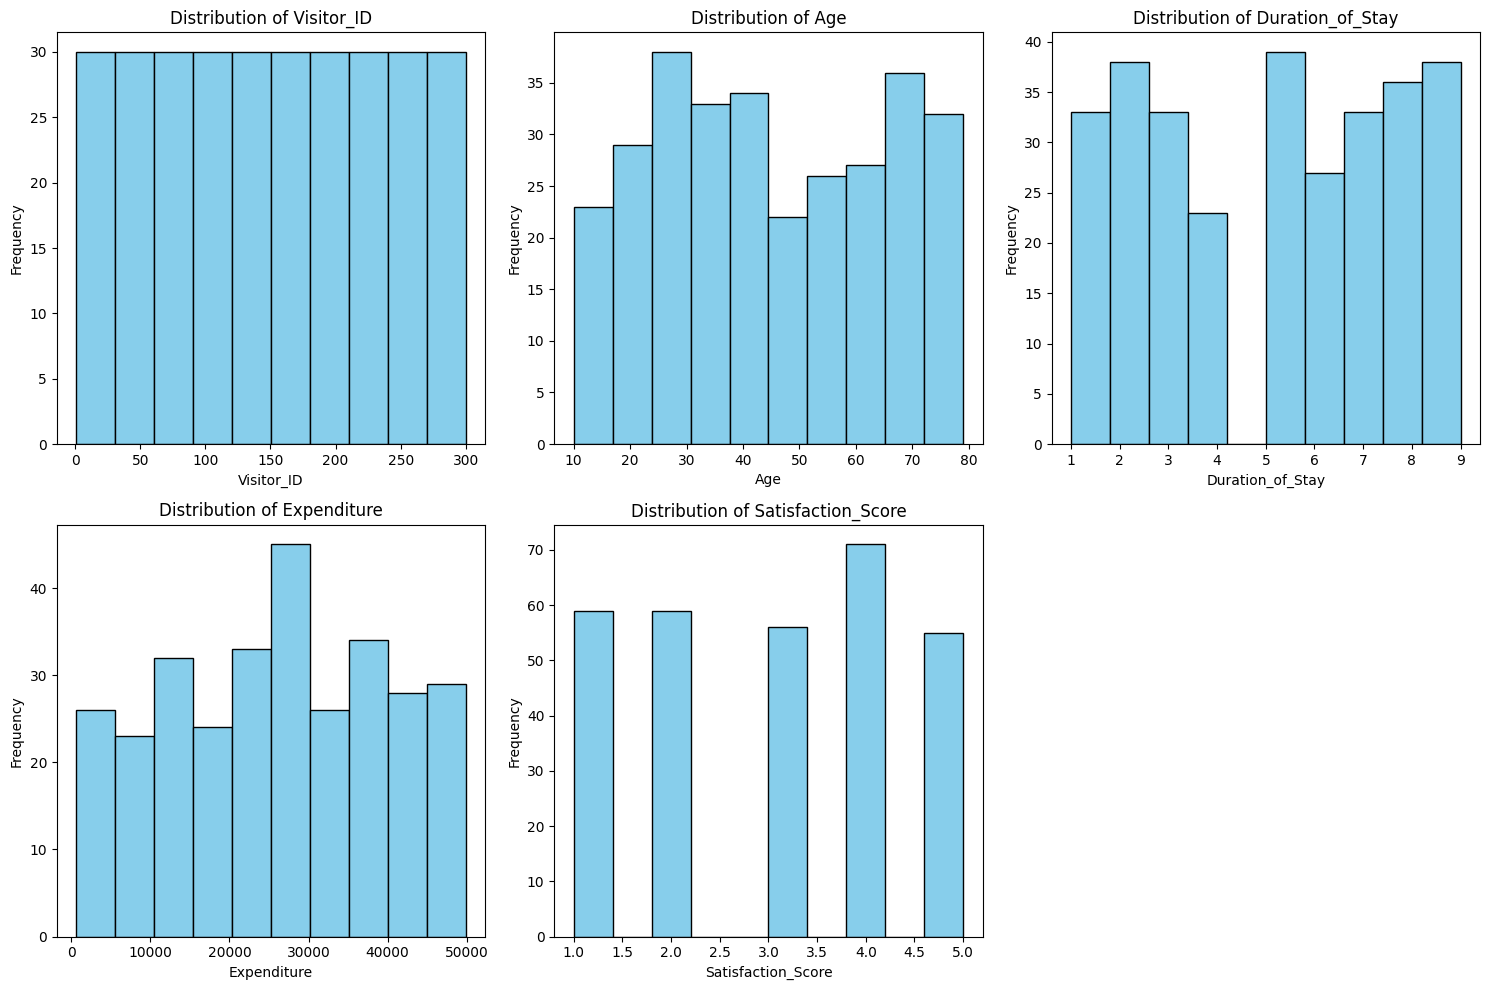


Correlation Matrix:
                     Visitor_ID       Age  Duration_of_Stay  Expenditure  \
Visitor_ID            1.000000 -0.011132          0.065336    -0.053418   
Age                  -0.011132  1.000000         -0.015832     0.011378   
Duration_of_Stay      0.065336 -0.015832          1.000000    -0.109614   
Expenditure          -0.053418  0.011378         -0.109614     1.000000   
Satisfaction_Score    0.003993 -0.026345         -0.086453    -0.103784   

                    Satisfaction_Score  
Visitor_ID                    0.003993  
Age                          -0.026345  
Duration_of_Stay             -0.086453  
Expenditure                  -0.103784  
Satisfaction_Score            1.000000  

Summary of Observations:


In [ ]:
# Examine data types
print("Data Types:\n", df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Descriptive statistics for numerical columns
numerical_cols = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Columns:\n", numerical_cols.describe())

# Explore unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
    print(f"\nUnique values and frequencies for {col}:\n{categorical_cols[col].value_counts()}")

# Analyze the distribution of numerical features using histograms
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization

for i, col in enumerate(numerical_cols.columns):
  plt.subplot(2, 3, i + 1)
  plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Summarize observations
print("\nSummary of Observations:")
# Add your observations here based on the results above

## Data cleaning

### Subtask:
Data Cleaning


**Reasoning**:
Re-check for missing values using `df.isna().sum()`, handle inconsistencies in categorical columns, analyze numerical columns for outliers, and remove duplicates.



In [ ]:
# Check for missing values again
missing_values = df.isna().sum()
print("Missing Values:\n", missing_values)

# Handle inconsistencies in categorical columns (example: 'Gender')
df['Gender'] = df['Gender'].str.strip().str.capitalize()
print("\nUnique values in 'Gender' after cleaning:\n", df['Gender'].unique())

# Analyze numerical columns for outliers (example: 'Age', 'Expenditure') and cap them
def cap_outliers(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

df['Age'] = cap_outliers(df['Age'])
df['Expenditure'] = cap_outliers(df['Expenditure'])

# Check for and remove duplicates
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")
df = df[~duplicates]
print(f"\nShape of DataFrame after removing duplicates: {df.shape}")

Missing Values:
 Visitor_ID            0
Gender                0
Age                   0
State                 0
Date_of_Visit         0
Duration_of_Stay      0
Mode_of_Transport     0
Purpose_of_Visit      0
Accommodation_Type    0
Expenditure           0
Satisfaction_Score    0
dtype: int64

Unique values in 'Gender' after cleaning:
 ['Male' 'Female']

Number of duplicate rows: 0

Shape of DataFrame after removing duplicates: (300, 11)


## Data analysis

### Subtask:
Analyze the cleaned data to identify relationships between variables and gain deeper insights.


**Reasoning**:
Analyze the cleaned data to identify relationships between variables and gain deeper insights by calculating the correlation matrix, grouped analysis, distribution analysis, and optionally hypothesis testing.



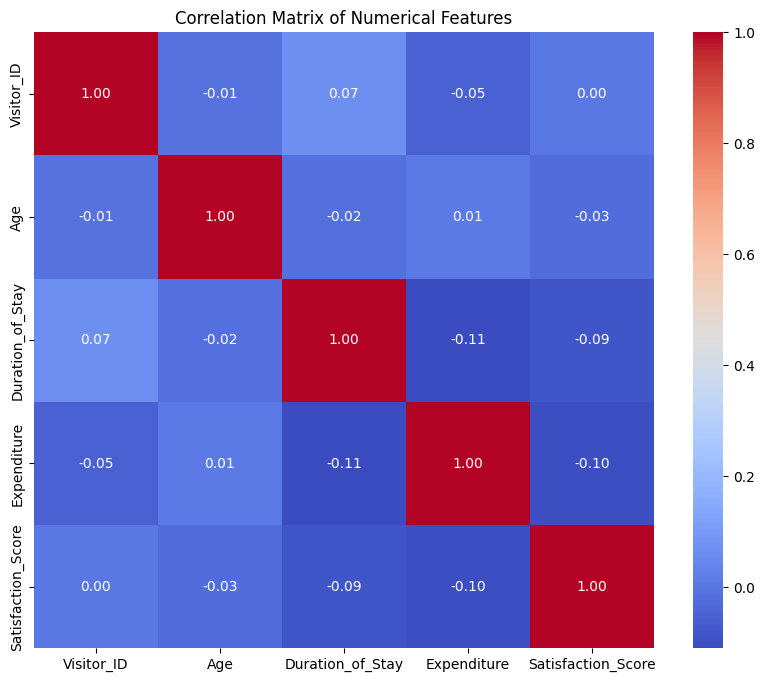


Grouped Analysis by Gender:
               Age                   Duration_of_Stay                   \
             mean median        std             mean median       std   
Gender                                                                  
Female  43.973154   42.0  19.782584         5.100671    5.0  2.698210   
Male    45.847682   45.0  20.964652         5.019868    5.0  2.629246   

         Expenditure                        Satisfaction_Score         \
                mean   median           std               mean median   
Gender                                                                  
Female  27515.906040  27925.0  14162.930286           2.986577    3.0   
Male    24656.463576  24534.0  13315.800113           3.039735    3.0   

                  
             std  
Gender            
Female  1.394907  
Male    1.408928  

Grouped Analysis by State:
                       Age                   Duration_of_Stay                   \
                     mean median 

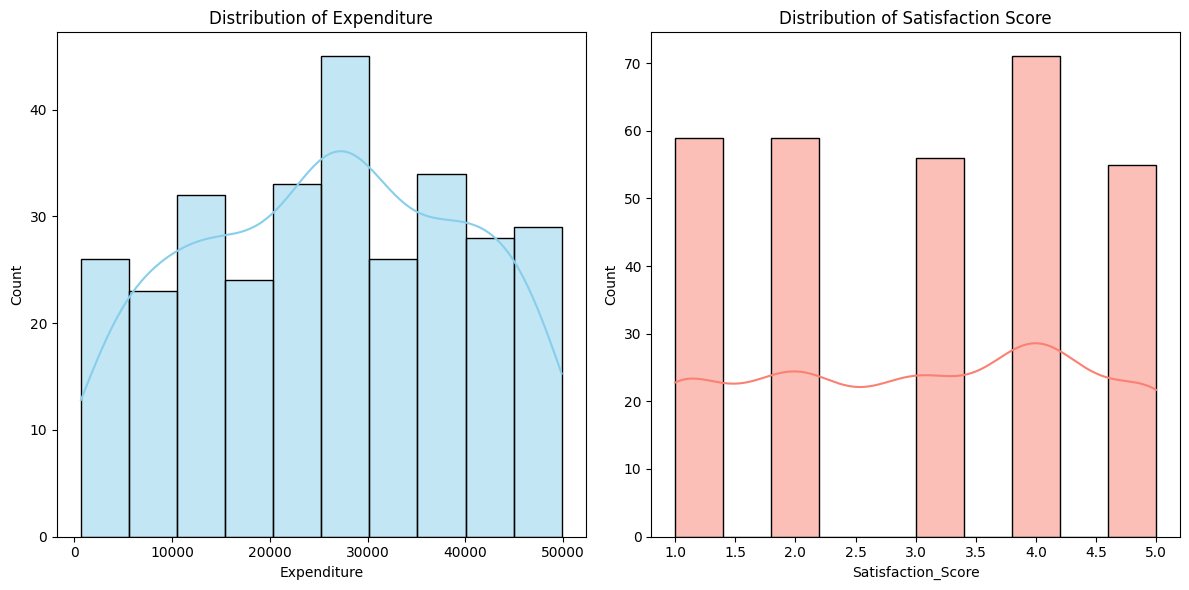


T-test for difference in expenditure between genders:
T-statistic: -1.80, P-value: 0.073

Average Satisfaction Scores per accommodation type:
 Accommodation_Type
Ashram        3.046154
Dharmshala    3.272727
Hotel         2.965517
Tent          2.760563
Name: Satisfaction_Score, dtype: float64

F-value: 1.7107289911618404, p-value: 0.16484655524162808


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

# Correlation Analysis
numerical_cols = df.select_dtypes(include=['number'])
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Grouped Analysis
grouped_analysis = df.groupby('Gender')[['Age', 'Duration_of_Stay', 'Expenditure', 'Satisfaction_Score']].agg(['mean', 'median', 'std'])
print("\nGrouped Analysis by Gender:\n", grouped_analysis)

grouped_analysis_state = df.groupby('State')[['Age', 'Duration_of_Stay', 'Expenditure', 'Satisfaction_Score']].agg(['mean', 'median', 'std'])
print("\nGrouped Analysis by State:\n", grouped_analysis_state)

# Distribution Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Expenditure'], kde=True, color='skyblue')
plt.title('Distribution of Expenditure')
plt.subplot(1, 2, 2)
sns.histplot(df['Satisfaction_Score'], kde=True, color='salmon')
plt.title('Distribution of Satisfaction Score')
plt.tight_layout()
plt.show()


# Hypothesis Testing (example: t-test for difference in expenditure between genders)
male_expenditure = df[df['Gender'] == 'Male']['Expenditure']
female_expenditure = df[df['Gender'] == 'Female']['Expenditure']
t_statistic, p_value = stats.ttest_ind(male_expenditure, female_expenditure)
print(f"\nT-test for difference in expenditure between genders:\nT-statistic: {t_statistic:.2f}, P-value: {p_value:.3f}")

# Example Hypothesis Testing (Accommodation Type vs. Satisfaction Score)
accommodation_satisfaction = df.groupby("Accommodation_Type")["Satisfaction_Score"].mean()
print("\nAverage Satisfaction Scores per accommodation type:\n", accommodation_satisfaction)
# Perform ANOVA test
# Create a dictionary to store group data
groups = {accommodation_type: df["Satisfaction_Score"][df["Accommodation_Type"] == accommodation_type].values
            for accommodation_type in df["Accommodation_Type"].unique()}
fvalue, pvalue = stats.f_oneway(*groups.values())
print(f"\nF-value: {fvalue}, p-value: {pvalue}")



## Data visualization

### Subtask:
Visualize key relationships and distributions from the data analysis.


**Reasoning**:
Create the visualizations specified in the instructions, saving each plot as a PNG file.



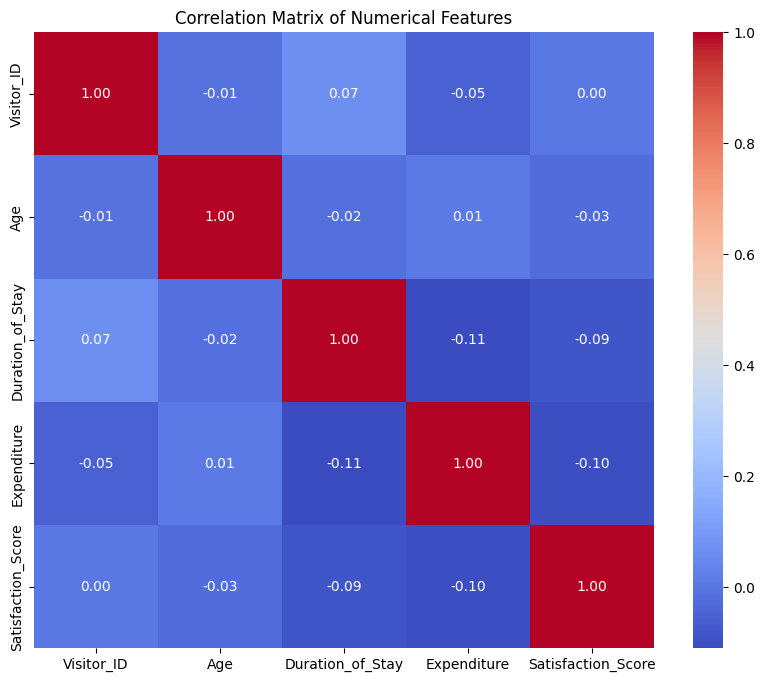

<Figure size 800x600 with 0 Axes>

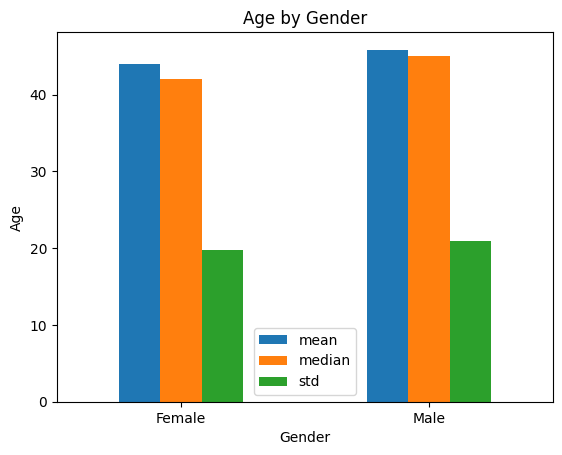

<Figure size 800x600 with 0 Axes>

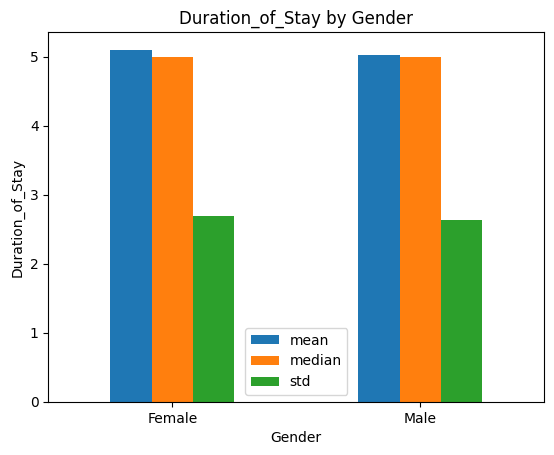

<Figure size 800x600 with 0 Axes>

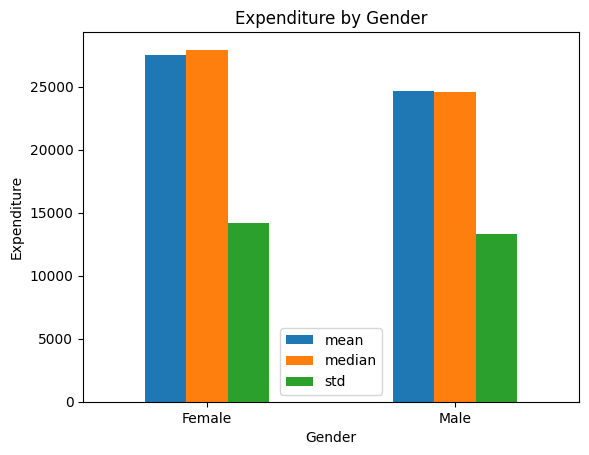

<Figure size 800x600 with 0 Axes>

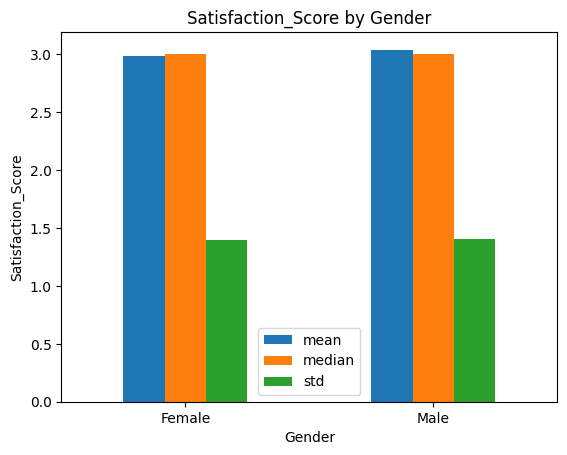

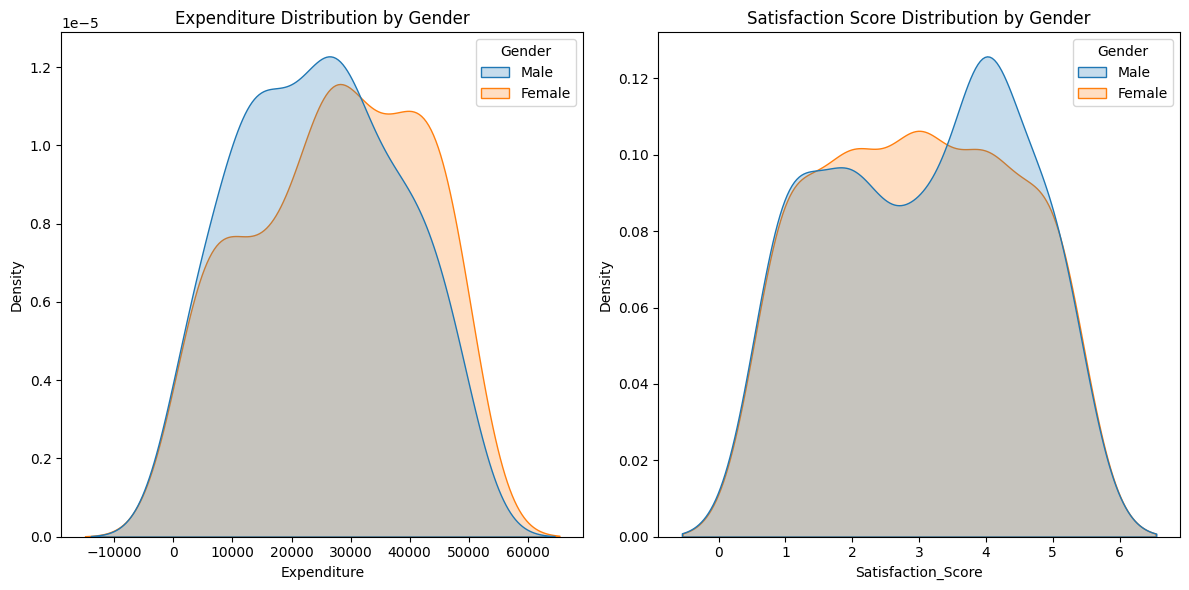

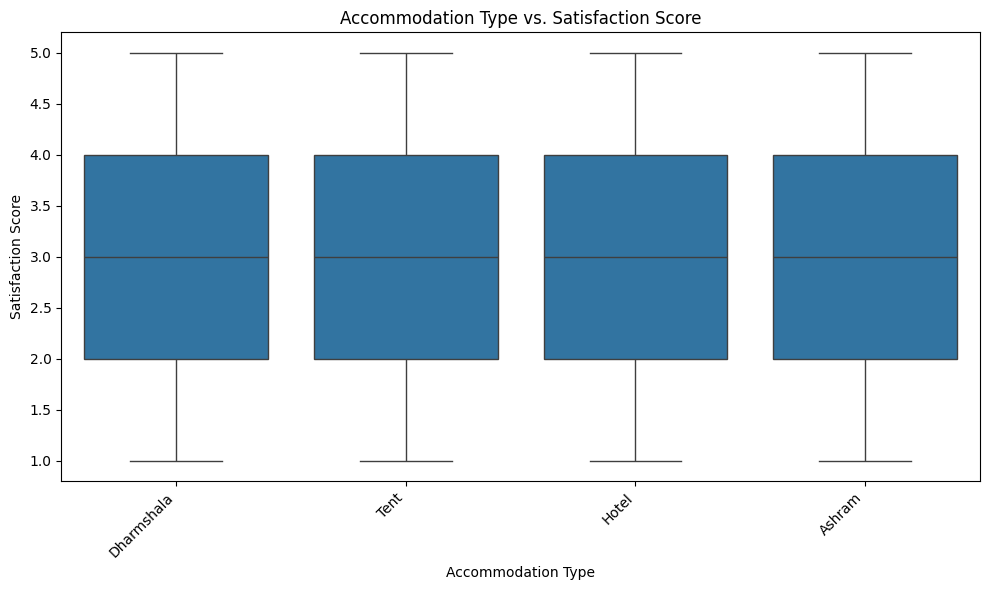

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation Heatmap
# Select only numerical columns before calculating correlation
numerical_cols = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()


# 2. Grouped Bar Plots
numerical_features = ['Age', 'Duration_of_Stay', 'Expenditure', 'Satisfaction_Score']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    df.groupby('Gender')[feature].agg(['mean', 'median', 'std']).plot(kind='bar', rot=0)
    plt.title(f'{feature} by Gender')
    plt.ylabel(feature)
    plt.savefig(f'{feature.lower()}_by_gender.png')
    plt.show()


# 3. Distribution Plots with Grouping
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Expenditure', hue='Gender', fill=True)
plt.title('Expenditure Distribution by Gender')
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='Satisfaction_Score', hue='Gender', fill=True)
plt.title('Satisfaction Score Distribution by Gender')
plt.tight_layout()
plt.savefig('expenditure_satisfaction_by_gender.png')
plt.show()

# 4. Accommodation Type vs. Satisfaction Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accommodation_Type', y='Satisfaction_Score', data=df)
plt.title('Accommodation Type vs. Satisfaction Score')
plt.xlabel('Accommodation Type')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('accommodation_satisfaction.png')
plt.show()

**Reasoning**:
The error message indicates that the `df.corr()` method encountered a string value ('Male') where it expected a float.  This is because the `corr()` method by default tries to compute correlations for all columns, including categorical ones. We need to select only the numerical columns for correlation calculation.



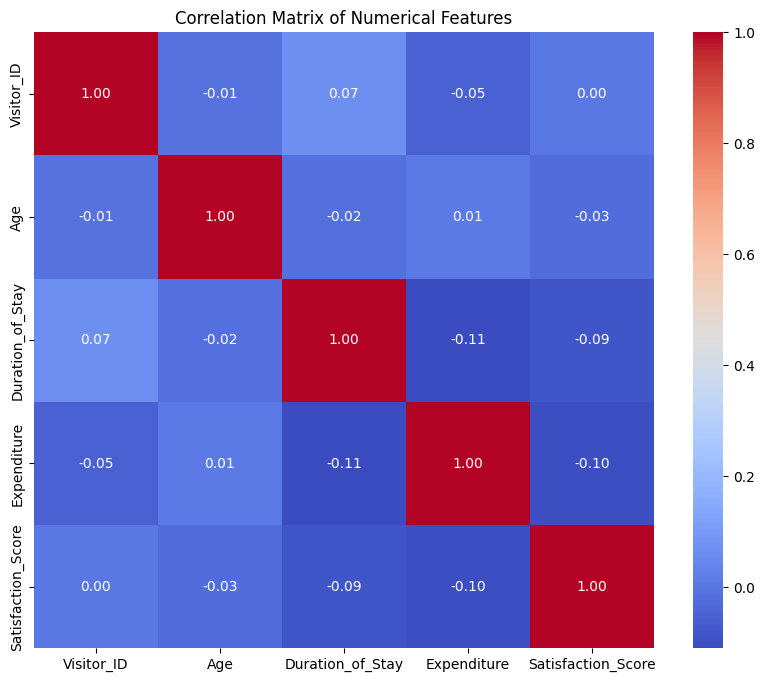

<Figure size 800x600 with 0 Axes>

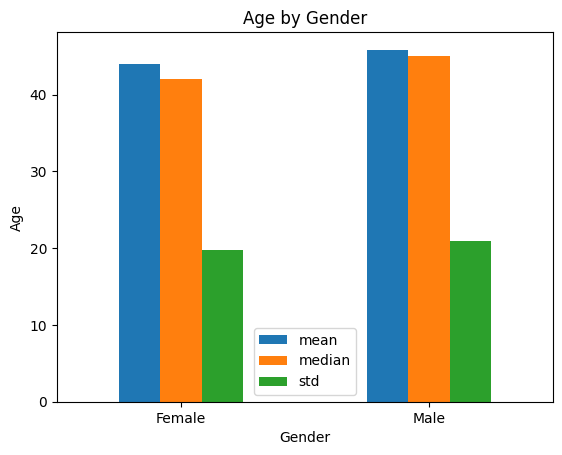

<Figure size 800x600 with 0 Axes>

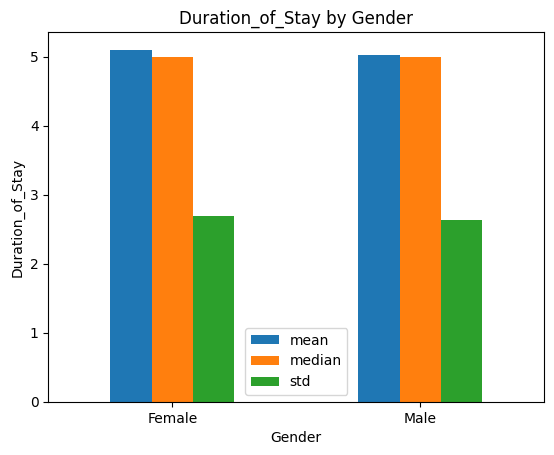

<Figure size 800x600 with 0 Axes>

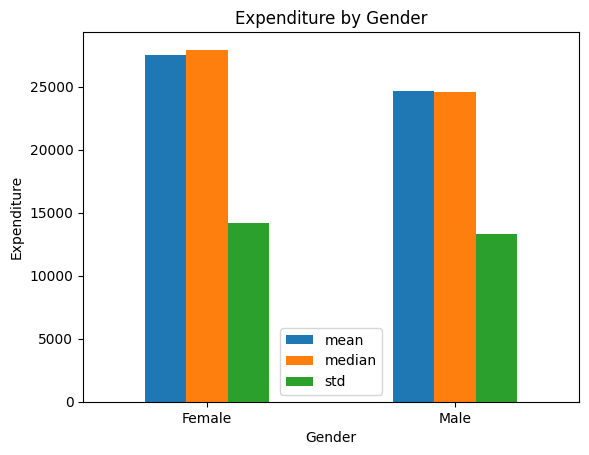

<Figure size 800x600 with 0 Axes>

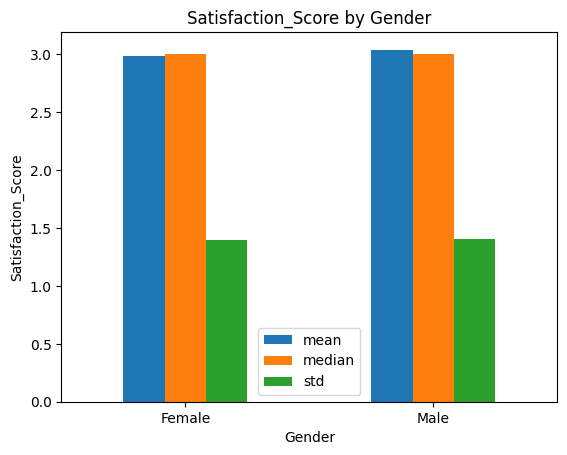

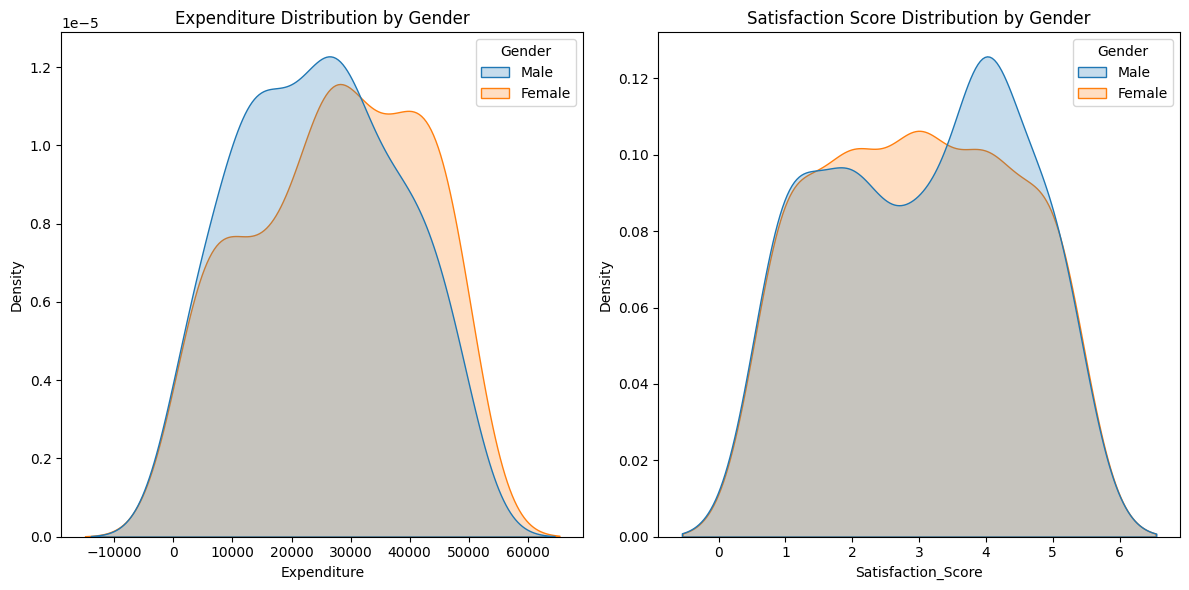

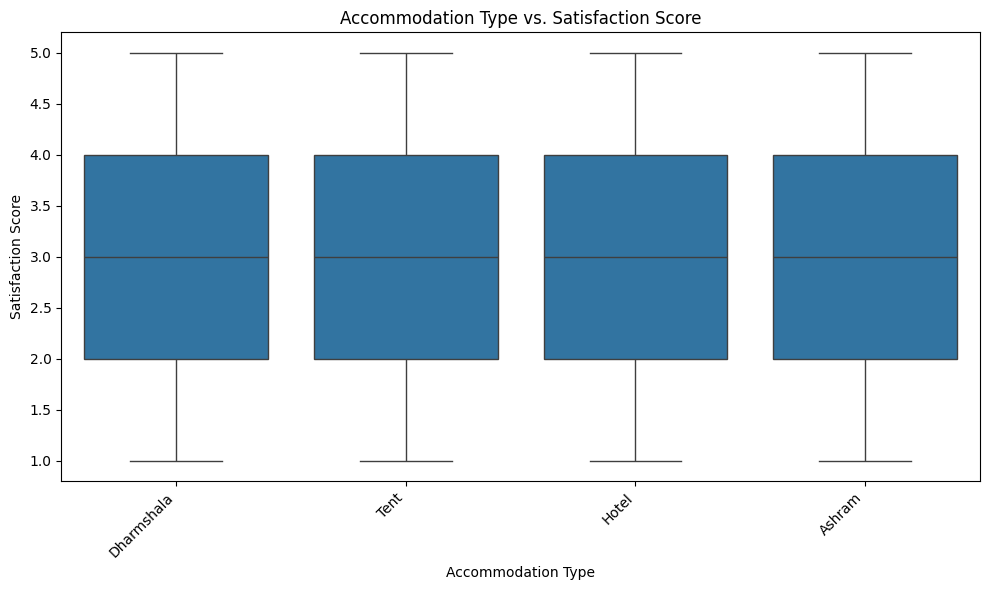

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation Heatmap
numerical_cols = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()


# 2. Grouped Bar Plots
numerical_features = ['Age', 'Duration_of_Stay', 'Expenditure', 'Satisfaction_Score']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    df.groupby('Gender')[feature].agg(['mean', 'median', 'std']).plot(kind='bar', rot=0)
    plt.title(f'{feature} by Gender')
    plt.ylabel(feature)
    plt.savefig(f'{feature.lower()}_by_gender.png')
    plt.show()


# 3. Distribution Plots with Grouping
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='Expenditure', hue='Gender', fill=True)
plt.title('Expenditure Distribution by Gender')
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='Satisfaction_Score', hue='Gender', fill=True)
plt.title('Satisfaction Score Distribution by Gender')
plt.tight_layout()
plt.savefig('expenditure_satisfaction_by_gender.png')
plt.show()

# 4. Accommodation Type vs. Satisfaction Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accommodation_Type', y='Satisfaction_Score', data=df)
plt.title('Accommodation Type vs. Satisfaction Score')
plt.xlabel('Accommodation Type')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('accommodation_satisfaction.png')
plt.show()

## Summary:

### Q&A
No questions detected in the provided task.

### Data Analysis Key Findings
* **No missing values:** The dataset had no missing values throughout the analysis.
* **Gender distribution:** The gender distribution is balanced between male and female.
* **Dominant purpose of visit:** Pilgrimage is the most frequent purpose of visit, followed by tourism and business.
* **Preferred modes of transport:** Bus and private vehicles are the most common modes of transport.
* **Accommodation preferences:** Hotels and Dharmshalas are the preferred accommodation types.
* **Weak correlations:** Weak correlations were observed between numerical variables, including a slightly negative correlation between 'Duration_of_Stay' and 'Expenditure', and between 'Expenditure' and 'Satisfaction_Score'.  Further investigation is recommended.
* **Outlier handling:** Outliers in 'Age' and 'Expenditure' were capped using the IQR method.
* **Statistical tests:** A t-test showed a marginal, non-significant difference in expenditure between genders. An ANOVA test revealed no significant difference in satisfaction scores across accommodation types.

### Insights or Next Steps
* Investigate the weak negative correlations between 'Duration_of_Stay' and 'Expenditure', and 'Expenditure' and 'Satisfaction_Score' to understand the underlying reasons.
* Explore relationships between categorical variables (e.g., State, Purpose\_of\_Visit) and numerical variables (e.g., Expenditure, Satisfaction\_Score) in more detail.
